In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun
import pandas as pd

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-07-21 20:36:16,333 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-07-21 20:36:16,334 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-07-21 20:36:16,334 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-21 20:36:16,334 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-07-21 20:36:16,335 Parameters: cosmological_simulation   = 0.0


In [3]:
def make_ray(x0, y0, z0, x, y, z, num):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray'+num+'.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [162]:
def hist_temp(ray, ion_, ion_mass, title, n_bins=20, 
              add_ion=True, plot=True): # 1D temperature histograms weighted by Ion Mass
    M = 1.9884099E30
    if add_ion==True:
        trident.add_ion_fields(ray, ions=ion_, ftype="gas", particle_type=False)
    
    mass_list = []
    colors = ['deeppink', 'indigo', 'orangered']
    alphas = [0.8,0.63,0.7]
    
    for i in range(len(ion_mass)):
        norm_ion_mass = np.array(ray.all_data()[ion_mass[i]])/M
        mass_list.append(norm_ion_mass)
        
    gas_temp = np.array(ray.all_data()[('gas', 'temperature')])
    
    gas_bin = 10**np.linspace(np.log10(np.max(gas_temp))-5,np.log10(np.max(gas_temp)), n_bins)
    
    if plot==True:
        fig = plt.figure(figsize=(8,6))
        for i in range(len(ion_mass)):
            plt.hist(gas_temp, color=colors[i], weights=mass_list[i], log=True, bins=gas_bin,
                     histtype='step', stacked=True, label=ion_[i], alpha=alphas[i], linewidth=3)
        plt.title(title, fontsize=18)
        plt.xlabel('Temperature [K]', fontsize=16)
        plt.xticks(fontsize=14)
        plt.xscale('log')
        plt.xlim(5*10**3, 5*10**6)
        plt.ylabel('Ion Mass [M/M$_\odot$]', fontsize=16)
        plt.yticks(fontsize=14)
        plt.legend(fontsize=12)

    return gas_temp, mass_list, gas_bin

In [155]:
def hist_subplots(data1,data2,labels,el):
    colors = ['deeppink', 'indigo', 'orangered']
    alphas = [0.8,0.63,0.7]
    temp1 = data1[0]
    temp2 = data2[0]
    mass1 = data1[1]
    mass2 = data2[1]
    gas_bin1 = data1[2]
    gas_bin2 = data2[2]
    
    fig = plt.figure(figsize=(17,6))
    fig.add_subplot(1,2,1)
    for i in range(len(labels)):
        plt.hist(temp1, color=colors[i], weights=mass1[i], 
             log=True, bins=gas_bin1, alpha=alphas[i], histtype='step', 
                 stacked=True, linewidth=3, label=labels[i])
    plt.xlabel('Temperature [K]', fontsize=14)
    plt.xticks(fontsize=14)
    plt.xscale('log')
    plt.xlim(5*10**3, 5*10**6)
    plt.ylabel('Ion Mass [M/M$_\odot$]', fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(el + ' (Ray 2)', fontsize=18)
    plt.legend(fontsize=12)


    fig.add_subplot(1,2,2)
    for j in range(len(labels)):
        plt.hist(temp2, color=colors[j], weights=mass2[j], log=True, 
                 bins=gas_bin2, alpha=alphas[j], histtype='step', 
                 stacked=True, linewidth=3, label=labels[j])
    plt.xlabel('Temperature [K]', fontsize=14)
    plt.xticks(fontsize=14)
    plt.xscale('log')
    plt.xlim(5*10**3, 5*10**6)
    plt.ylabel('Ion Mass [M/M$_\odot$]', fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(el+' (Ray 3)', fontsize=18)
    plt.legend(fontsize=12)

In [5]:
ray2 = make_ray(1.0528,0,0.518, 1.0528, 1, 0.518, '2')
ray3 = make_ray(1.0833,0,0.478, 1.0833, 1, 0.478, '3')

yt : [INFO     ] 2022-07-21 20:36:31,575 Getting segment at z = 0.0: [0.5264 0.     0.259 ] unitary to [0.5264 0.5    0.259 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-07-21 20:36:31,579 Getting subsegment: [0.5264 unitary, 0.0 unitary, 0.259 unitary] to [0.5264 unitary, 0.5 unitary, 0.259 unitary].
yt : [INFO     ] 2022-07-21 20:36:32,225 Saving field data to yt dataset: ray2.h5.
yt : [INFO     ] 2022-07-21 20:36:32,308 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-07-21 20:36:32,308 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-07-21 20:36:32,308 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-07-21 20:36:32,309 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt 

In [6]:
pd.read_csv('IE.csv')

,Elements,Ionization Energy [eV]
0,Al II,5.985386
1,Mg II,7.645748
2,Fe II,7.902783
3,Si II,8.151526
4,C II,11.260818
5,O II,13.617661
6,Fe III,16.188008
7,Si III,16.345546
8,Al III,18.828833
9,C III,24.383065


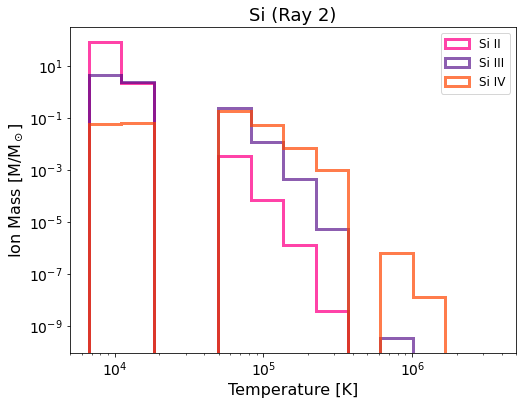

In [175]:
Si_r2 = hist_temp(ray2, ['Si II','Si III', 'Si IV'], ['Si_p1_mass', 'Si_p2_mass', 'Si_p3_mass'], 
                 'Si (Ray 2)',  n_bins=24, add_ion=False)
plt.savefig('Si_stacked.jpg', dpi=800)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)
yt : [WARNING  ] 2022-07-22 01:30:54,221 Field ('gas', 'Si_p1_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,221 Field ('gas', 'Si_p1_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,222 Field ('gas', 'Si_p1_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,222 Field ('gas', 'Si_p1_mass') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,223 Field ('gas', 'Si_p2_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,223 Field ('gas', 'Si_p2_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,223 Field ('gas', 'Si_p2_density') already exists. Not clobbering.
yt

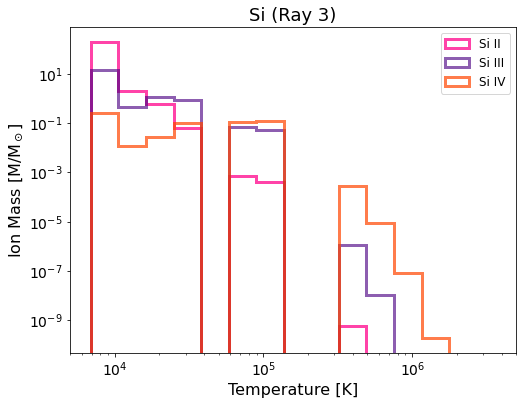

In [164]:
Si_r3 = hist_temp(ray3, ['Si II','Si III', 'Si IV'], ['Si_p1_mass', 'Si_p2_mass', 'Si_p3_mass'], 
                  'Si (Ray 3)',  n_bins=28, add_ion=True)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)
yt : [WARNING  ] 2022-07-22 01:30:54,605 Field ('gas', 'C_p1_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,606 Field ('gas', 'C_p1_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,606 Field ('gas', 'C_p1_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,607 Field ('gas', 'C_p1_mass') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,607 Field ('gas', 'C_p2_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,607 Field ('gas', 'C_p2_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,608 Field ('gas', 'C_p2_density') already exists. Not clobbering.
yt : [WAR

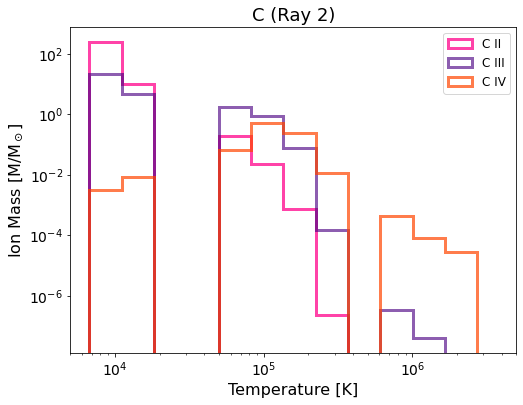

In [165]:
C_r2 = hist_temp(ray2, ['C II','C III', 'C IV'], ['C_p1_mass', 'C_p2_mass', 'C_p3_mass'], 
                 'C (Ray 2)',  n_bins=24, add_ion=True)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)
yt : [WARNING  ] 2022-07-22 01:30:54,987 Field ('gas', 'C_p1_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,987 Field ('gas', 'C_p1_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,988 Field ('gas', 'C_p1_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,988 Field ('gas', 'C_p1_mass') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,988 Field ('gas', 'C_p2_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,989 Field ('gas', 'C_p2_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:54,989 Field ('gas', 'C_p2_density') already exists. Not clobbering.
yt : [WAR

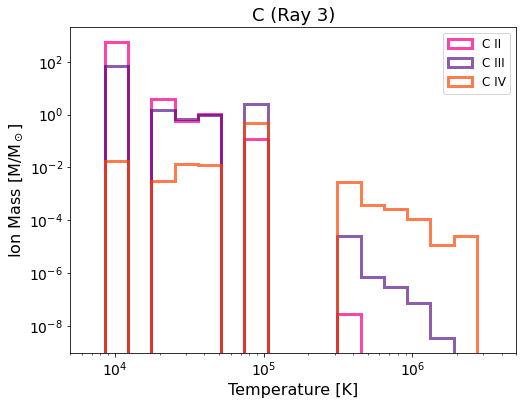

In [166]:
C_r3 = hist_temp(ray3, ['C II','C III', 'C IV'], ['C_p1_mass', 'C_p2_mass', 'C_p3_mass'], 
                 'C (Ray 3)',  n_bins=33, add_ion=True)

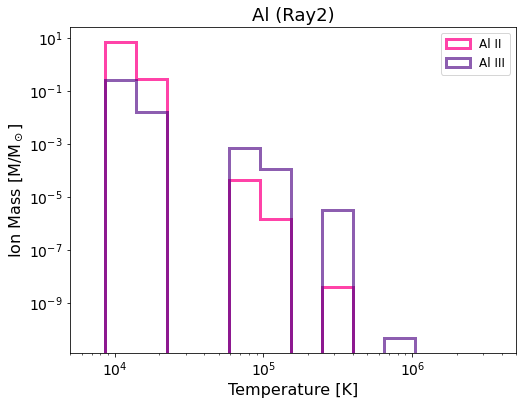

In [167]:
Al_r2 = hist_temp(ray2, ['Al II', 'Al III'], ['Al_p1_mass', 'Al_p2_mass'], 'Al (Ray2)', add_ion=False, 
                  n_bins=25)

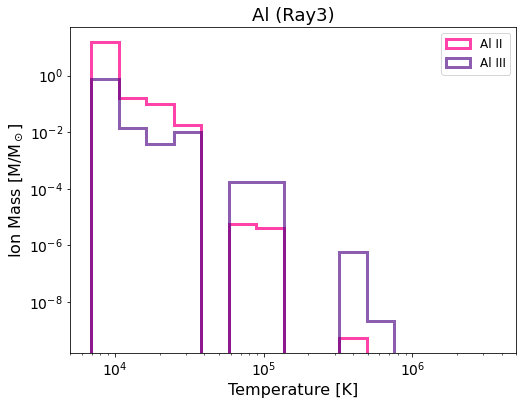

In [168]:
Al_r3 = hist_temp(ray3, ['Al II', 'Al III'], ['Al_p1_mass', 'Al_p2_mass'], 'Al (Ray3)', add_ion=False, 
                  n_bins=28)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)
yt : [WARNING  ] 2022-07-22 01:30:56,437 Field ('gas', 'Mg_p1_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:56,438 Field ('gas', 'Mg_p1_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:56,439 Field ('gas', 'Mg_p1_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:56,439 Field ('gas', 'Mg_p1_mass') already exists. Not clobbering.


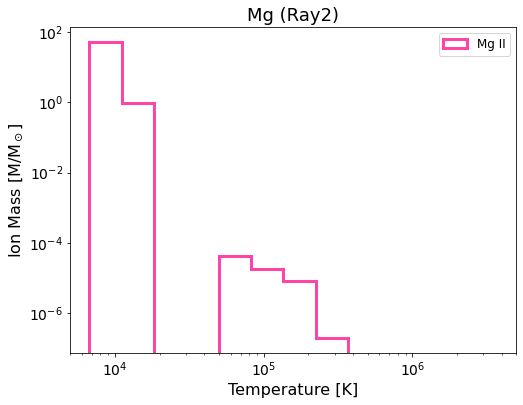

In [169]:
Mg_r2 = hist_temp(ray2, ['Mg II'], ['Mg_p1_mass'], 'Mg (Ray2)', n_bins=24)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)
yt : [WARNING  ] 2022-07-22 01:30:57,165 Field ('gas', 'Mg_p1_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:57,166 Field ('gas', 'Mg_p1_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:57,167 Field ('gas', 'Mg_p1_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:57,168 Field ('gas', 'Mg_p1_mass') already exists. Not clobbering.


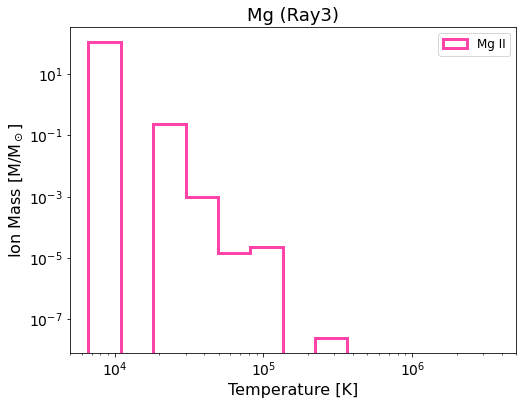

In [170]:
Mg_r3 = hist_temp(ray3, ['Mg II'], ['Mg_p1_mass'], 'Mg (Ray3)', n_bins=24)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)
yt : [WARNING  ] 2022-07-22 01:30:57,911 Field ('gas', 'Fe_p1_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:57,912 Field ('gas', 'Fe_p1_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:57,914 Field ('gas', 'Fe_p1_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:57,915 Field ('gas', 'Fe_p1_mass') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:57,916 Field ('gas', 'Fe_p2_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:57,917 Field ('gas', 'Fe_p2_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-07-22 01:30:57,918 Field ('gas', 'Fe_p2_density') already exists. Not clobbering.
yt

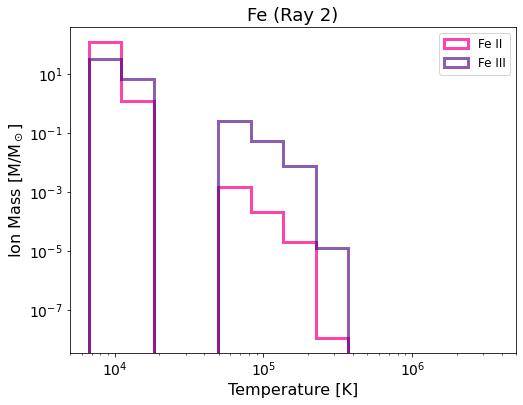

In [171]:
Fe_r2 = hist_temp(ray2,['Fe II', 'Fe III'], ['Fe_p1_mass', 'Fe_p2_mass'], 'Fe (Ray 2)', n_bins=24)

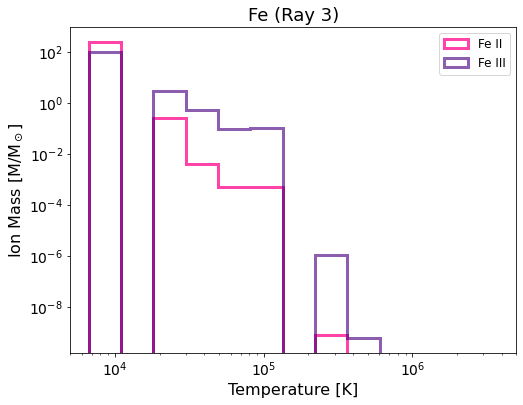

In [172]:
Fe_r3 = hist_temp(ray3,['Fe II', 'Fe III'], ['Fe_p1_mass', 'Fe_p2_mass'], 'Fe (Ray 3)', n_bins=24, 
                  add_ion=False)

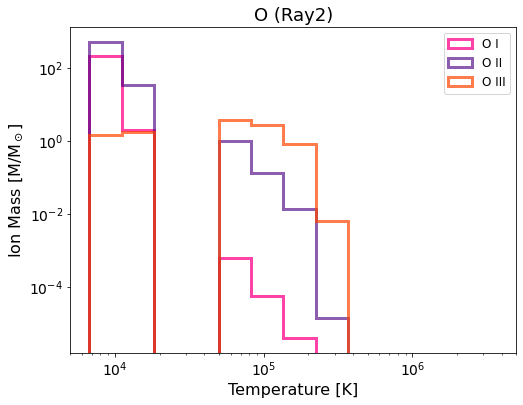

In [173]:
O_r2 = hist_temp(ray2, ['O I', 'O II', 'O III'], ['O_p0_mass','O_p1_mass', 'O_p2_mass'],
                'O (Ray2)', n_bins=24, add_ion=False)

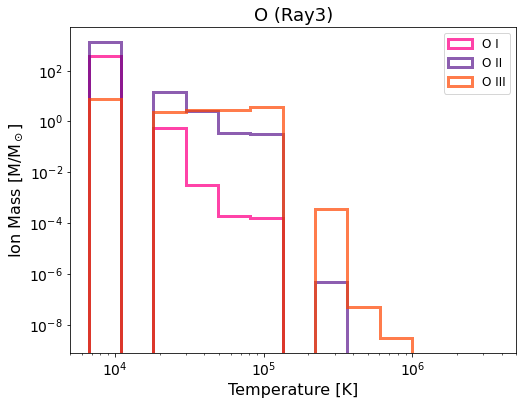

In [174]:
O_r3 = hist_temp(ray3, ['O I', 'O II', 'O III'], ['O_p0_mass','O_p1_mass', 'O_p2_mass'],
                'O (Ray3)', n_bins=24, add_ion=False)

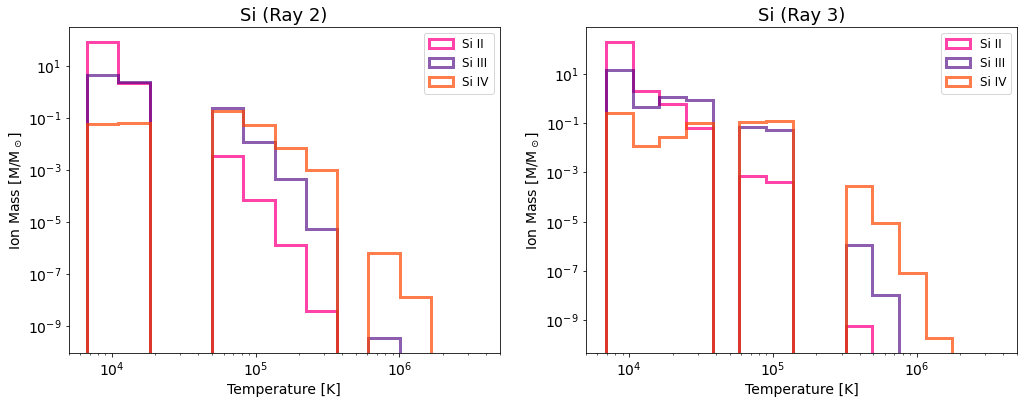

In [156]:
hist_subplots(Si_r2,Si_r3,['Si II', 'Si III', 'Si IV'], 'Si')

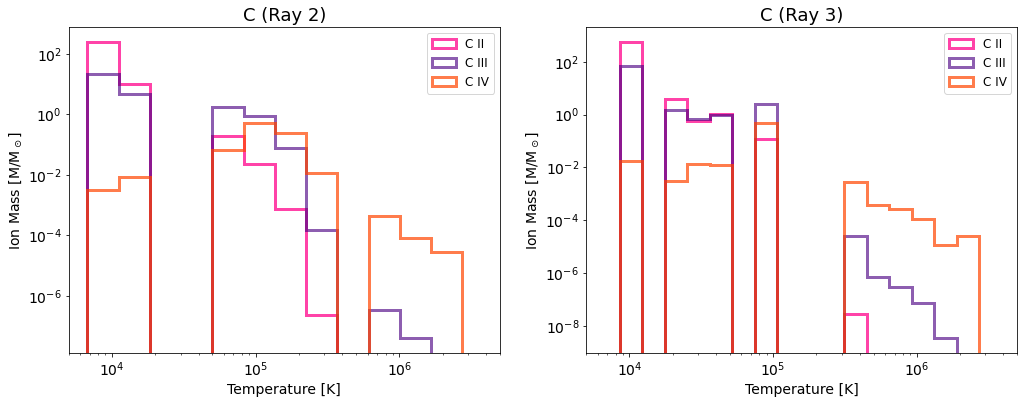

In [157]:
hist_subplots(C_r2,C_r3,['C II', 'C III', 'C IV'], 'C')

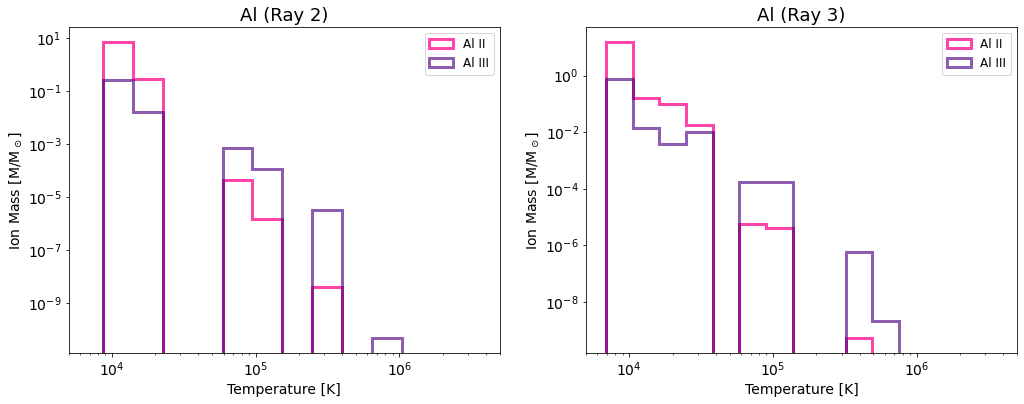

In [158]:
hist_subplots(Al_r2,Al_r3,['Al II', 'Al III'], 'Al')

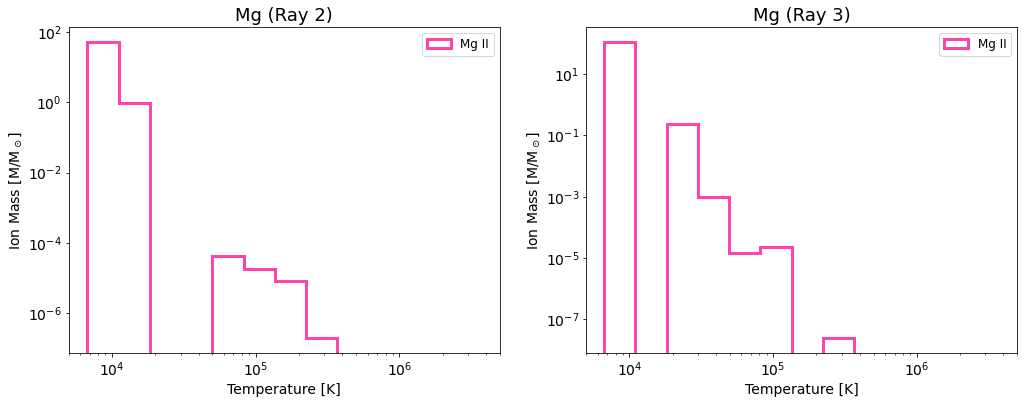

In [159]:
hist_subplots(Mg_r2,Mg_r3,['Mg II'],'Mg')

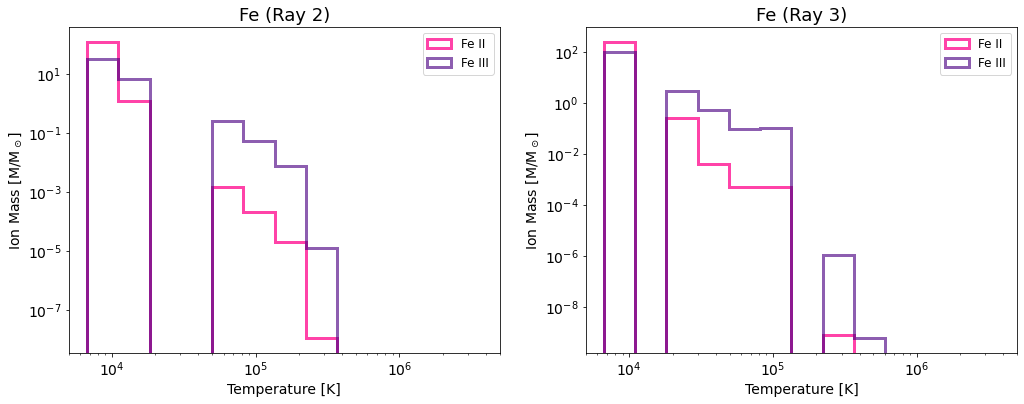

In [160]:
hist_subplots(Fe_r2,Fe_r3,['Fe II', 'Fe III'],'Fe')

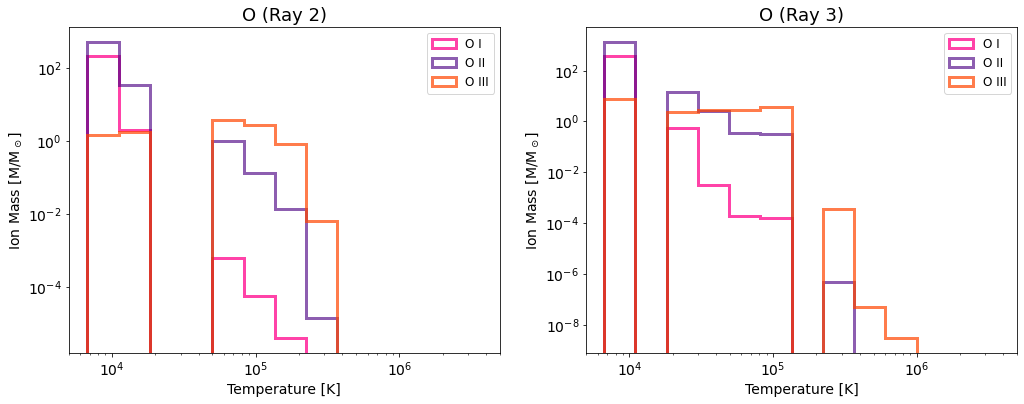

In [161]:
hist_subplots(O_r2, O_r3, ['O I', 'O II', 'O III'], 'O')